# Sentiment Analysis of Alexandre Dumas' *The Count of Monte Cristo*
We will be using Python to analyse, specifically, the connection between the love and redemption that Dantés goes through to the characters of Haydée and Mercédes.

First step is to open all the documents into memory so that when we mention them, Python will know what we're reffering to. In this case, every text file has been open into a variable with the same name for better organization. 

Although we could combine all the text into one single variable, the NLP program we will be using later cannot handle such an enourmous amount of text. Therefore, we have decided to keep each volume separate.

In [29]:
with open ('comte-1.txt') as f:
    comte_text1 = f.read()

In [30]:
with open ('comte-2.txt') as f:
    comte_text2 = f.read()

In [31]:
with open ('comte-3.txt') as f:
    comte_text3 = f.read()

In [32]:
with open ('comte-4.txt') as f:
    comte_text4 = f.read()

Next step is to import all libraries that will be needed for this process. 

SpaCy
: a NLP (natural language processing) library that will be able to read, categorize and tokenize every word in this text with the help of the French language pipeline called 'fr_core_news_sm'. (https://realpython.com/natural-language-processing-spacy-python/)

Matplotlib 
: a library that will help create visualizations, like graphs, in Python. (https://matplotlib.org/)

Re or Regular Expressions Module
: a built-in Python library that is made to recognize, search, match, split, replace, or work with patterns in this text. (https://docs.python.org/3/library/re.html)

NumPy (Numerical Python)
: a Python library that works with data structures and mathematical operations. (https://numpy.org/doc/stable/user/absolute_beginners.html)

textblob
: a built-in Python library that helps with processing textual data. In this case, it will help to determine whether words are positive, negative or neutral.

textblob_fr is made specifically for the French language.

Blobber
: a way to reuse textblob objects to make a more efficient use of memory.

In [33]:
import spacy
nlp = spacy.load('fr_core_news_sm')

import matplotlib.pyplot as plt

import re

import numpy as np

from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
from nltk.tokenize import sent_tokenize

With all libraries imported into this environment, the first step is defining a function that will look into every volume and separate each volume's chapters by using the Roman numerals as a signal to make the split.

In [34]:
def split_into_chapters(text):
    pattern = r"\n{2,}([IVXLCDM]+)\n+\s*(.*?)\n"
    
    matches = re.split(pattern, text)
 
    # Once the variables are defined, then we make a dictionary that will store the chapters.
    chapters = {}
    for i in range(1, len(matches), 3):
        chapter_num = matches[i]
        chapter_title = matches[i + 1]
        chapter_content = matches[i + 2].strip()
        chapters[f"{chapter_num}"] = chapter_content
 
    return chapters

Now we are using this function to go through every volume and splitting them into chapters, this will allow us to break the text into more manageable chunks that we can analyze.

chapter_1 belongs to the chapters in volume 1 and every volume to their chapters accordingly.

In [35]:
chapters_1 = split_into_chapters(comte_text1)
chapters_2 = split_into_chapters(comte_text2)
chapters_3 = split_into_chapters(comte_text3)
chapters_4 = split_into_chapters(comte_text4)

Now, we will store all the chapters from every volume into the all_chaps variable that will be able to reduce the amount of variables we are working with. So instead of looking at four individual variables, we are only using one now.

In [36]:
all_chapts = {k: v for d in [chapters_1, chapters_2, chapters_3, chapters_4] for k, v in d.items()}

Now, we are defining a function that will tokenize the text through the use of spaCy (with the nlp variable) and then it will calculate every time a specified entity is named then those numbers will be stored in a dictionary that we created with the variable freqs.

Entities come from the NER (Named Entity Recognition) part of the spaCy pipeline:

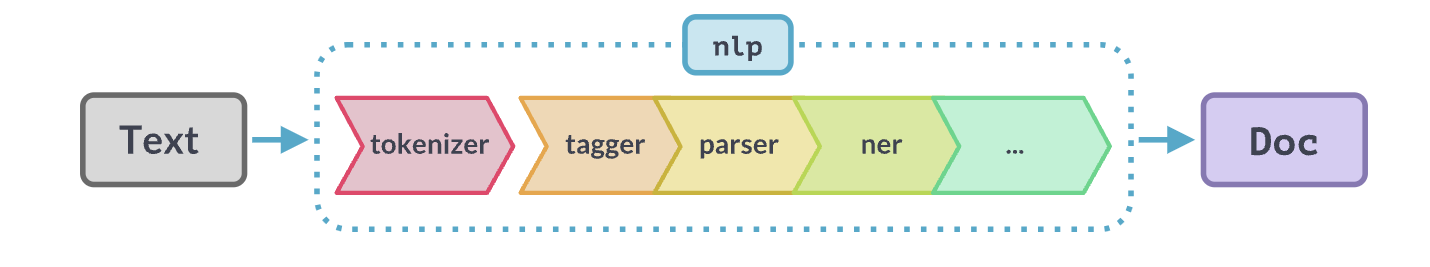

From this process, the text is being analyzed and when there are objects with proper names, spaCy will assign labels to those named entities through NER.

For example, in this case we are working with characters like Dantès, therefore the tag should be PER - person, character.

But there are other categories within NER like Location, Percent or Organization.

In [37]:
def calculate_freqs(chapters, target_ent):
    freqs = {}
    for number, chapter in chapters.items():
        doc = nlp(chapter)
        freqs[number] = 0
        for ent in doc.ents:
            if ent.text == target_ent:
                freqs[number] += 1
    return freqs

Since entities can sometimes be tagged incorrecty, we are adding the EntityRuler to our pipeline in order to give our preferences to the NER part of the pipeline to ensure that spaCy is marking Dantés, Haydée and Mercédes as character names since they're the focus of our analysis.

In [38]:
from spacy.pipeline import EntityRuler

ruler = nlp.add_pipe("entity_ruler", before = "ner")

patterns = [{"label": "PER", "pattern" : "Dantès"}, {"label": "PER", "pattern" : "Haydée"}, {"label": "PER", "pattern" : "Mercédès"}]

ruler.add_patterns(patterns)

Now, we are telling Python to use the calculate_freqs function that we defined earlier while looking for the 'Mercédès' named entity through all the chapters and store those numbers in the all_Mfreqs variable. This will give us the amount of times that Mercédès has been mentioned throughout the entirety of the text.

In [39]:
all_Mfreqs = calculate_freqs(all_chapts, 'Mercédès')

After, we repeat the process while looking for the 'Haydée' named entity and storing those numbers in the all_Hfreqs variable.

In [40]:
all_Hfreqs = calculate_freqs(all_chapts, 'Haydée')

Now, we are defining the tb (textblob) variable as a part of speech (pos) tagger and a pattern analyzer. This helps make lines shorter and it makes it more efficient for repeated usage.

In [41]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

With the textblob, we will look at each chapter within each volume (since they're stored in the all_chapts variable) and then it will store all the sentiment scores that we get into the all_sentiments variable.

In [42]:
all_sentiments = [tb(chapter).sentiment[0] for chapter in list(all_chapts.values())]

Since now we have all scores, then we will plot them into a graph.

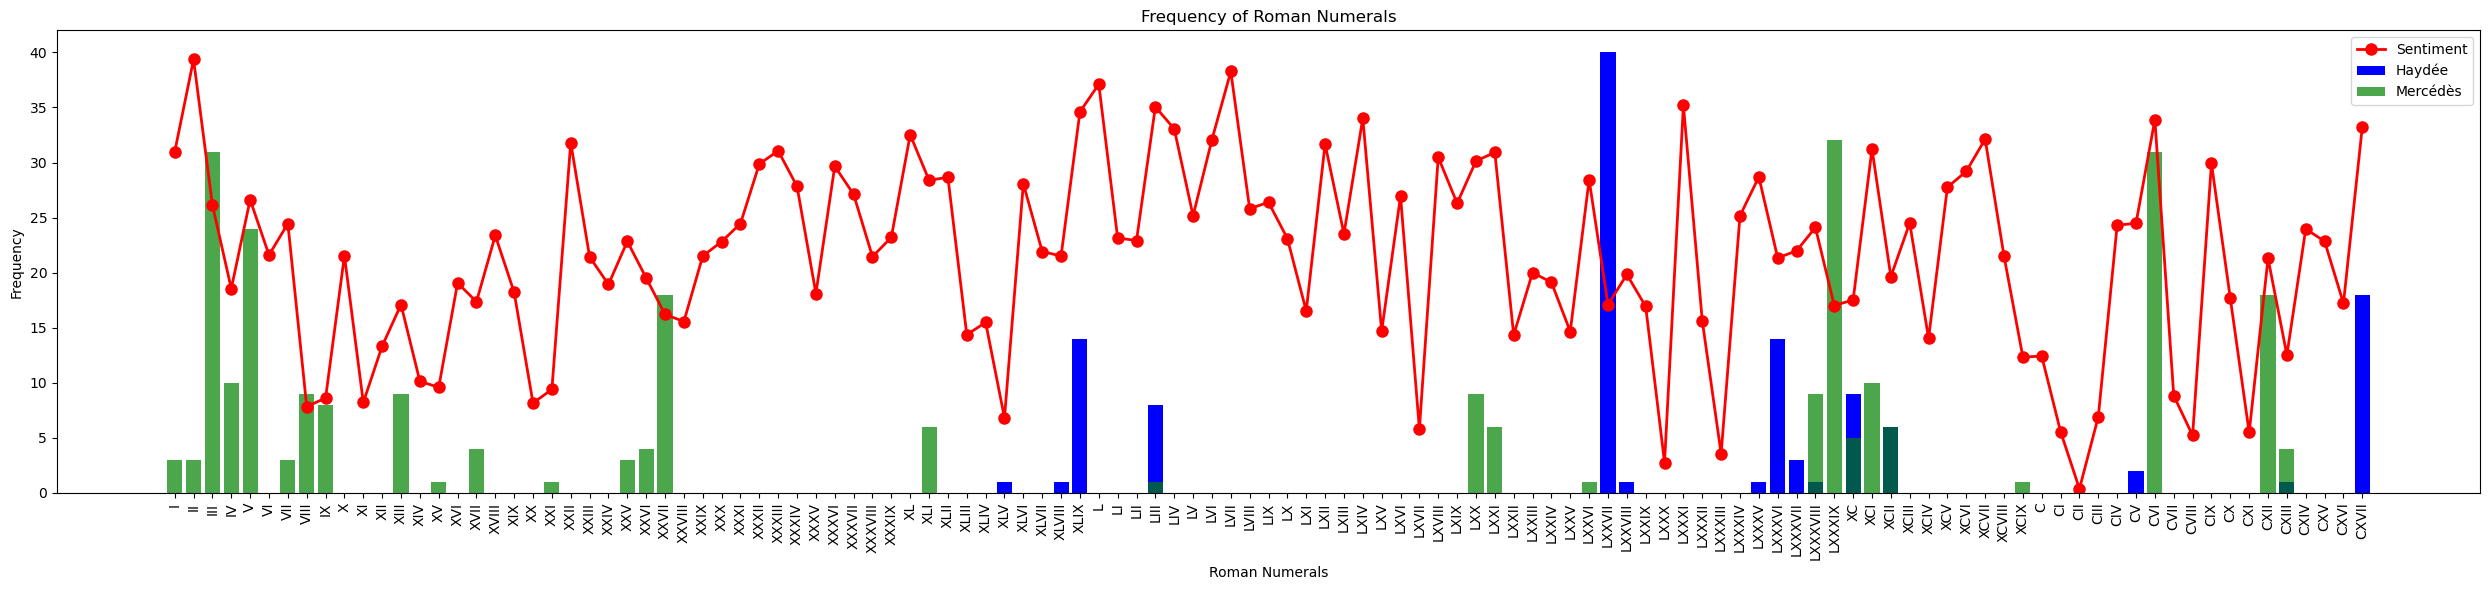

In [43]:
H_keys = list(all_Hfreqs.keys())
H_values = list(all_Hfreqs.values())

M_keys = list(all_Mfreqs.keys())
M_values = list(all_Mfreqs.values())

# We will be using matplotlib, which we imported at the beginning, to make a graphchart.
plt.figure(figsize=(25, 6))  # These numbers let us manipulate the size of the graph for all chapters to fit.
plt.bar(H_keys, H_values, color='blue', label='Haydée') # These variables allow us to choose different colors for Haydée and Mercédes.
plt.bar(M_keys, M_values, color='green', label='Mercédès', alpha=0.7)

# These are the list of x and y labels for the graph.
plt.xlabel('Roman Numerals')
plt.ylabel('Frequency')
plt.title('Frequency of Roman Numerals')

# This is the variable that allow us to rotate the labels for the chapter numbers.
plt.xticks(rotation=90)

# These variables allow us to make the sentiment scores fit into the chart since the numbers are not using the same scale.
# Remember that sentiment scores use a -1 (negative) to 0 (neutral) to 1 (positive).
min_sentiment = -0.02
max_sentiment = 0.17
min_bar = 0
max_bar = 40

# Function to normalize sentiment scores so that they're consistent with the range of mentions.
def normalize_sentiment(score, min_sentiment, max_sentiment, min_bar, max_bar):
    return (score - min_sentiment) / (max_sentiment - min_sentiment) * (max_bar - min_bar) + min_bar

normalized_sentiment = [normalize_sentiment(score, min_sentiment, max_sentiment, min_bar, max_bar) for score in all_sentiments]

plt.plot(range(len(normalized_sentiment)), normalized_sentiment, marker='o', color='red', linestyle='-', linewidth=2, markersize=8, label='Sentiment')

plt.legend()
plt.tight_layout() 
plt.show()

For the final view of this analysis, we will combine the graphs of both sentiment and mentions of the characters to be able to have a more complete understanding of the flow of the text and the emotions within it.

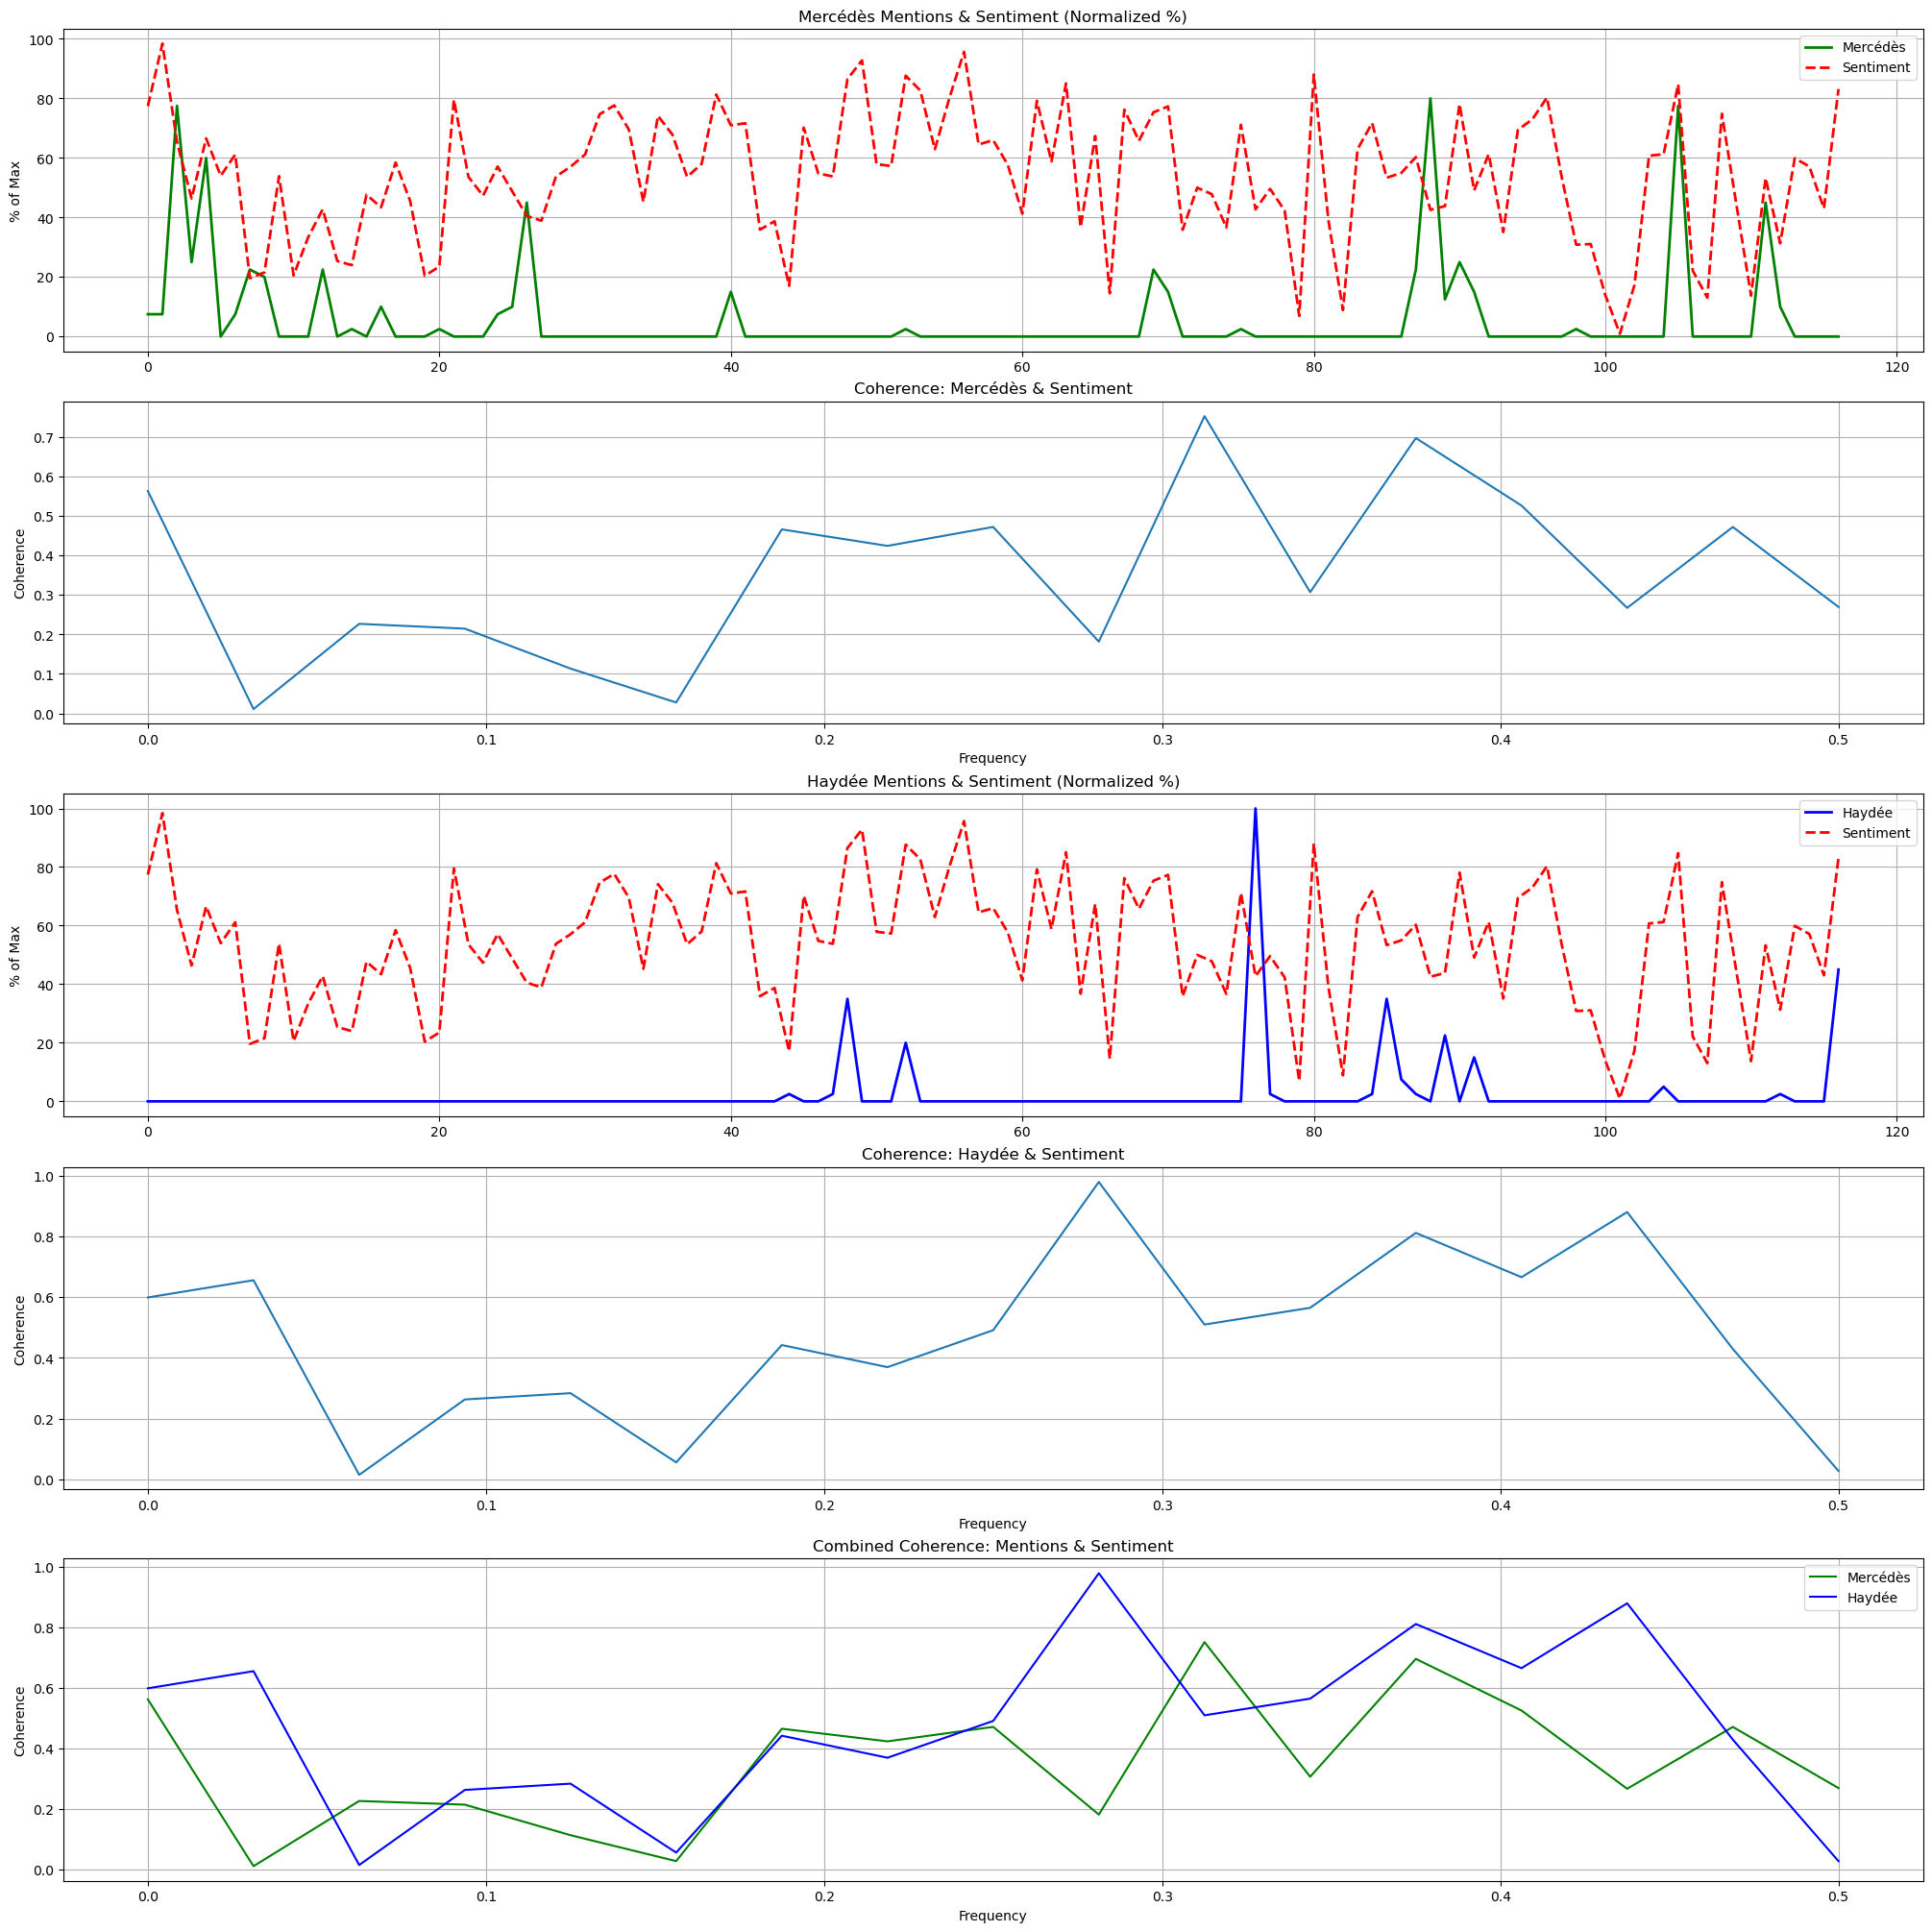

In [45]:
def to_percent(values, max_val):
    return [v / max_val * 100 for v in values]

max_freq = 40  # This is the maximum amount of times either Haydée or Mercédès are mentioned so this is the base for the max value.
H_values_percent = to_percent(H_values, max_freq)
M_values_percent = to_percent(M_values, max_freq)

# This will normalize the sentiment scores (decimals) into percentages like the other values.
min_sentiment = -0.02
max_sentiment = 0.17
sentiment_range = max_sentiment - min_sentiment
normalized_sentiment = [(s - min_sentiment) / sentiment_range * 100 for s in all_sentiments]

# X-axis values
x = np.arange(len(normalized_sentiment))

fig, axs = plt.subplots(5, 1, figsize=(20, 20), constrained_layout=True)

# --- Plot 1: Mercédès line + sentiment ---
axs[0].plot(x, M_values_percent, label='Mercédès', color='green', linewidth=2)
axs[0].plot(x, normalized_sentiment, label='Sentiment', color='red', linestyle='--', linewidth=2)
axs[0].set_title('Mercédès Mentions & Sentiment (Normalized %)')
axs[0].set_ylabel('% of Max')
axs[0].legend()
axs[0].grid(True)

# --- Plot 2: Coherence (Mercédès vs. Sentiment) ---
cxy_M, f_M = axs[1].cohere(M_values_percent, normalized_sentiment, NFFT=32, Fs=1)
axs[1].set_ylabel('Coherence')
axs[1].set_title('Coherence: Mercédès & Sentiment')
axs[1].grid(True)

# --- Plot 3: Haydée line + sentiment ---
axs[2].plot(x, H_values_percent, label='Haydée', color='blue', linewidth=2)
axs[2].plot(x, normalized_sentiment, label='Sentiment', color='red', linestyle='--', linewidth=2)
axs[2].set_title('Haydée Mentions & Sentiment (Normalized %)')
axs[2].set_ylabel('% of Max')
axs[2].legend()
axs[2].grid(True)

# --- Plot 4: Coherence (Haydée vs. Sentiment) ---
cxy_H, f_H = axs[3].cohere(H_values_percent, normalized_sentiment, NFFT=32, Fs=1)
axs[3].set_ylabel('Coherence')
axs[3].set_title('Coherence: Haydée & Sentiment')
axs[3].grid(True)

# --- Plot 5: Combined Coherence Plot ---
axs[4].plot(f_M, cxy_M, label='Mercédès', color='green')
axs[4].plot(f_H, cxy_H, label='Haydée', color='blue')
axs[4].set_title('Combined Coherence: Mentions & Sentiment')
axs[4].set_xlabel('Frequency')
axs[4].set_ylabel('Coherence')
axs[4].legend()
axs[4].grid(True)

plt.show()